### Preparing the Environment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt

df = pd.read_csv("supermarket_sales.csv")

### Data Exploration

In [2]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


### Data Cleaning

##### Drop irrelevant columns

In [5]:
df = df.drop(columns=["Invoice ID", "gross margin percentage", "Tax 5%", "cogs", "Rating"])

##### Missing values

In [6]:
df.isnull().sum()

Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Total            0
Date             0
Time             0
Payment          0
gross income     0
dtype: int64

##### Duplicated values

In [7]:
df.duplicated().any()

False

##### Handling date and time

In [8]:
df.Date = pd.to_datetime(df.Date)

df.Time = [i[:2] for i in df.Time]
df.Time = df.Time.astype(int)
df.rename(columns={"Time": "Hour"}, inplace=True)

df[["Date", "Hour"]].head()

,Date,Hour
0,2019-01-05,13
1,2019-03-08,10
2,2019-03-03,13
3,2019-01-27,20
4,2019-02-08,10


### Data Analisys and Visualization

##### What is the total gross income by product line?

In [9]:
df.groupby("Product line")["gross income"].sum().sort_values(ascending=False)

Product line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Home and lifestyle        2564.8530
Health and beauty         2342.5590
Name: gross income, dtype: float64

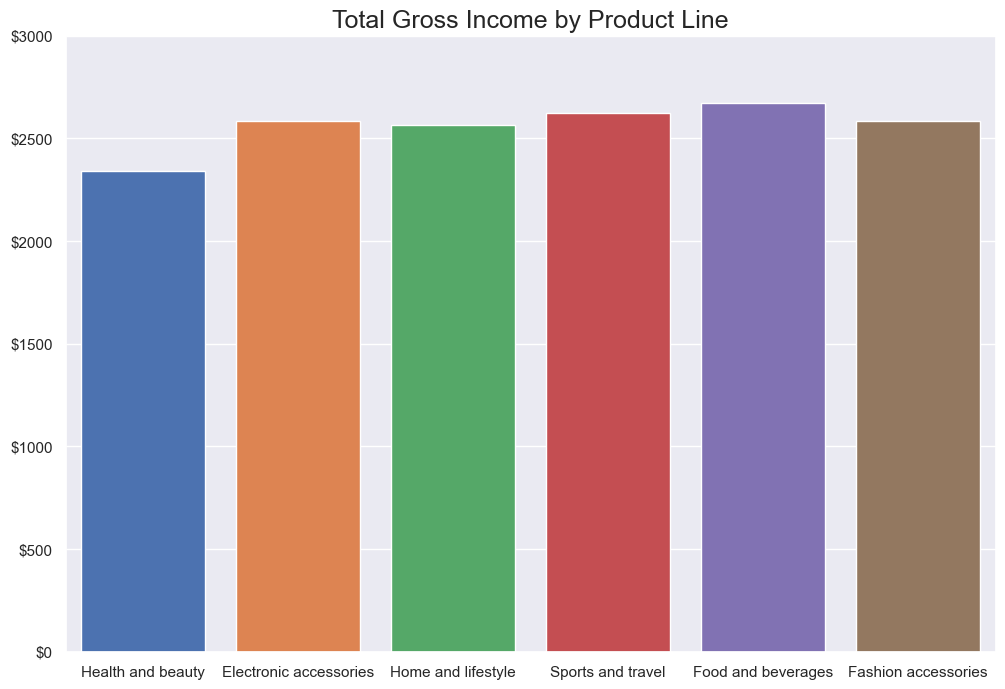

In [10]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))
g = sns.barplot(x="Product line", y="gross income", data=df, estimator=sum, errorbar=None, saturation=1);
g.set_title("Total Gross Income by Product Line", size=18)
g.set(xlabel="", ylabel="")
yticks= g.get_yticks()
g.set_yticks(ticks = yticks, labels = [f"${int(i)}" for i in yticks]);

##### What are the totals by brach for each product line?

In [11]:
df.groupby(["Branch", "Product line"])["Total"].sum()

Branch  Product line          
A       Electronic accessories    18317.1135
        Fashion accessories       16332.5085
        Food and beverages        17163.1005
        Health and beauty         12597.7530
        Home and lifestyle        22417.1955
        Sports and travel         19372.6995
B       Electronic accessories    17051.4435
        Fashion accessories       16413.3165
        Food and beverages        15214.8885
        Health and beauty         19980.6600
        Home and lifestyle        17549.1645
        Sports and travel         19988.1990
C       Electronic accessories    18968.9745
        Fashion accessories       21560.0700
        Food and beverages        23766.8550
        Health and beauty         16615.3260
        Home and lifestyle        13895.5530
        Sports and travel         15761.9280
Name: Total, dtype: float64

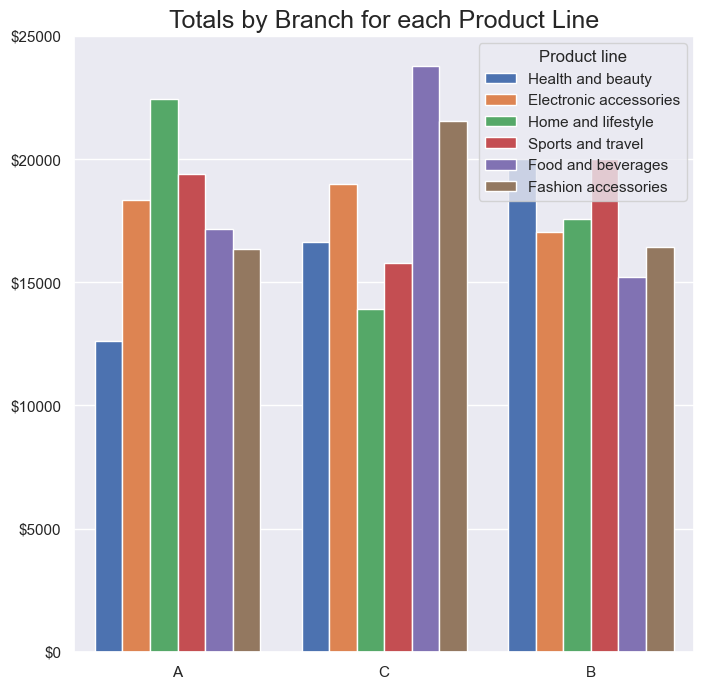

In [12]:
plt.figure(figsize=(8, 8))
g = sns.barplot(x="Branch", y="Total", hue="Product line", data=df, estimator=sum, errorbar=None, saturation=1);
g.set_title("Totals by Branch for each Product Line", size=18)
g.set(xlabel="", ylabel="")
yticks= g.get_yticks()
g.set_yticks(ticks = yticks, labels = [f"${int(i)}" for i in yticks]);

##### Which is the most used payment method by product line?

In [13]:
df.groupby(["Product line", "Payment"])["Payment"].count()

Product line            Payment    
Electronic accessories  Cash           71
                        Credit card    46
                        Ewallet        53
Fashion accessories     Cash           57
                        Credit card    56
                        Ewallet        65
Food and beverages      Cash           57
                        Credit card    61
                        Ewallet        56
Health and beauty       Cash           49
                        Credit card    50
                        Ewallet        53
Home and lifestyle      Cash           51
                        Credit card    45
                        Ewallet        64
Sports and travel       Cash           59
                        Credit card    53
                        Ewallet        54
Name: Payment, dtype: int64

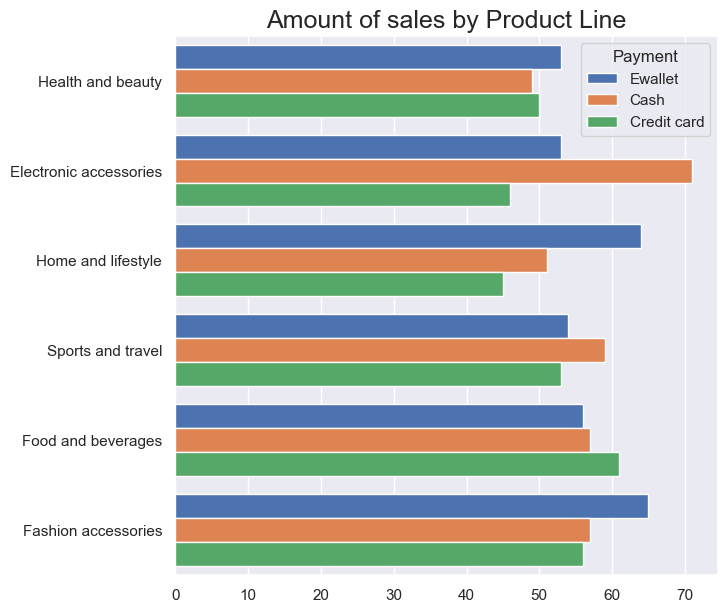

In [14]:
plt.figure(figsize=(7, 7))
sns.set_style("darkgrid")
g = sns.countplot(y="Product line", hue="Payment", data=df, saturation=1)
g.set_title("Amount of sales by Product Line", size=18)
g.set(xlabel="", ylabel="");


##### How much was sold each month?

In [15]:
total_by_month = df.groupby(df.Date.dt.month)["Total"].sum()
total_by_month

Date
1    116291.868
2     97219.374
3    109455.507
Name: Total, dtype: float64

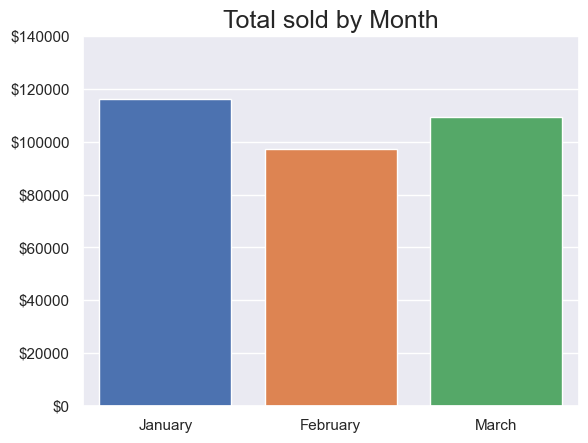

In [16]:
g = sns.barplot(x=total_by_month.index, y=total_by_month, saturation=1);
g.set_title("Total sold by Month", size=18)
g.set(xlabel="", ylabel="")
yticks= g.get_yticks()
g.set_xticks(ticks = [0, 1, 2], labels = ["January", "February", "March"])
g.set_yticks(ticks = yticks, labels = [f"${int(i)}" for i in yticks]);

##### How much is sold on average each day a week?

In [17]:
total_by_date = df.groupby([df.Date, df.Date.dt.day_name()])["Total"].sum()
total_by_date


Date        Date     
2019-01-01  Tuesday      4745.1810
2019-01-02  Wednesday    1945.5030
2019-01-03  Thursday     2078.1285
2019-01-04  Friday       1623.6885
2019-01-05  Saturday     3536.6835
                           ...    
2019-03-26  Tuesday      1962.5130
2019-03-27  Wednesday    2902.8195
2019-03-28  Thursday     2229.4020
2019-03-29  Friday       4023.2430
2019-03-30  Saturday     4487.0595
Name: Total, Length: 89, dtype: float64

In [18]:
mean_by_day = total_by_date.groupby([i[1] for i in total_by_date.index]).mean().sort_values(ascending=False)
mean_by_day

Saturday     4316.985346
Tuesday      3960.172731
Sunday       3704.824375
Thursday     3488.403692
Friday       3378.949269
Wednesday    3363.933462
Monday       3158.256500
Name: Total, dtype: float64

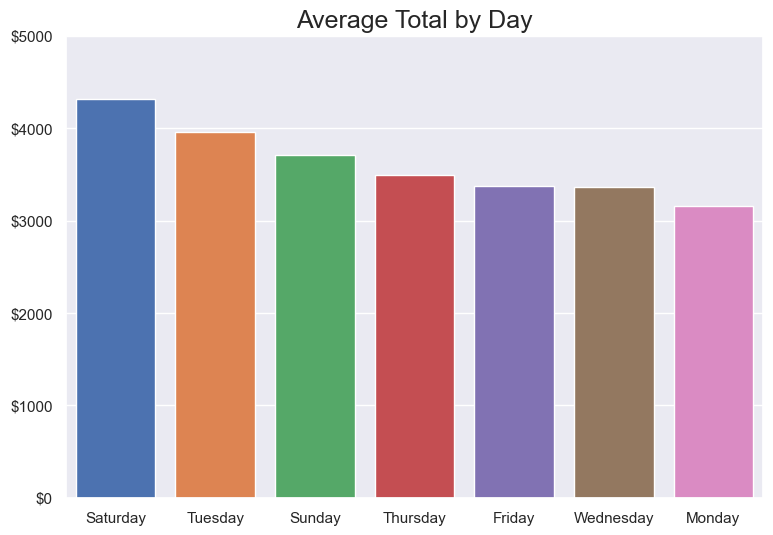

In [19]:
plt.figure(figsize=(9, 6))
g = sns.barplot(x=mean_by_day.index, y=mean_by_day, errorbar=None, saturation=1, estimator=sum)
g.set_title("Average Total by Day", size=18)
g.set(xlabel="", ylabel="")
yticks= g.get_yticks()
g.set_yticks(ticks = yticks, labels = [f"${int(i)}" for i in yticks]);